In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/awal40/ML-Projects/refs/heads/main/Salinan%20student_scores.csv'
dataset = pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analisys

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Figure size 1200x600 with 0 Axes>

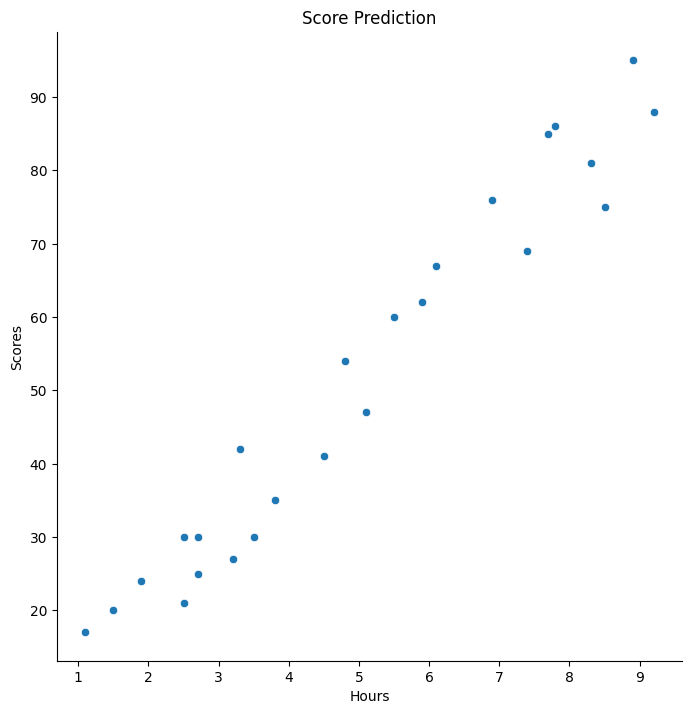

In [5]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],height=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

### Feature Engineering

In [6]:
df = dataset.copy()

In [7]:
#Check Duplicated Data
print(f"Data Sebelum Pemeriksaan Duplikat: {df.shape}")

Data Sebelum Pemeriksaan Duplikat: (25, 2)


In [8]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [9]:
df = df.drop_duplicates()

In [10]:
print(f"Data Setelah Pemeriksaan Duplikat: {df.shape}")

Data Setelah Pemeriksaan Duplikat: (25, 2)


In [11]:
#Check Missing Value Handling
df.isna().sum()

,0
Hours,0
Scores,0


hasil menunjukan tidak ada missing value

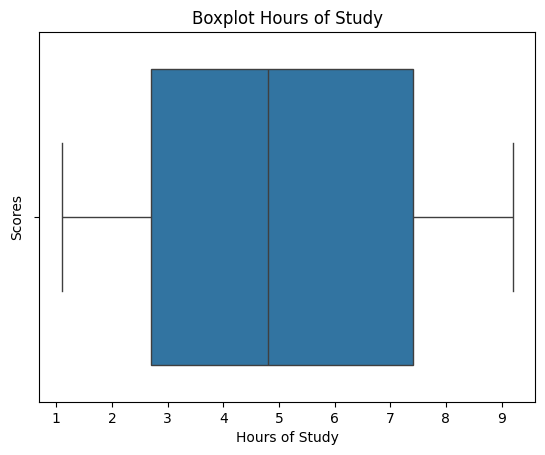

In [12]:
#Outlier Analisys
sns.boxplot(x="Hours", data = df)
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.title("Boxplot Hours of Study")
plt.show()

hasil menunujukan tidak ada outlier, selanjutkan dilakukan modelling machine learning serta men-split data menjadi X_train,X_test->Predictor, Y_train,Y_test-> variabel target

### Splitting Data

In [13]:
#Hours of Study Data
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
#Scores Data
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [15]:
#Import Machine Learning Data dari sckit learn
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [17]:
X_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [18]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [21]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [22]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [23]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [24]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [25]:
# Fitting model menggunakan Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [27]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [28]:
# Prediksi Scores untuk Test values
y_pred = lr_model.predict(X_test)

In [29]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [30]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

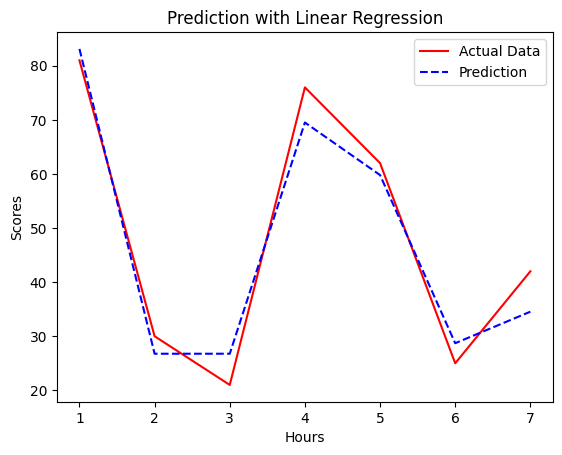

In [31]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [32]:
# Calculate R square value
rsq = r2_score(y_test,y_pred)
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [36]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [37]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

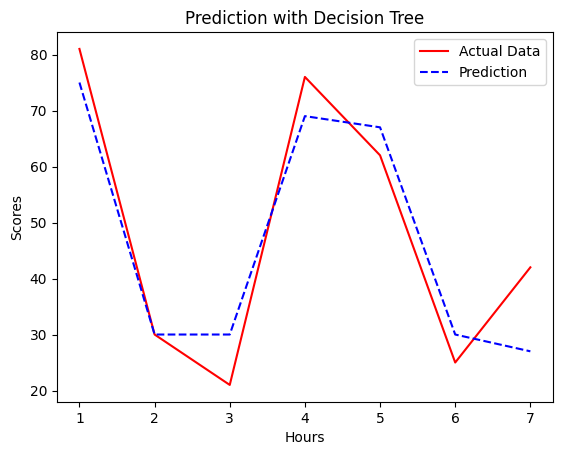

In [38]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [39]:
rsq_dt = r2_score(y_test,y_pred_dt)
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([80.02, 28.08, 28.08, 72.97, 62.25, 29.25, 28.45])

In [43]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [44]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

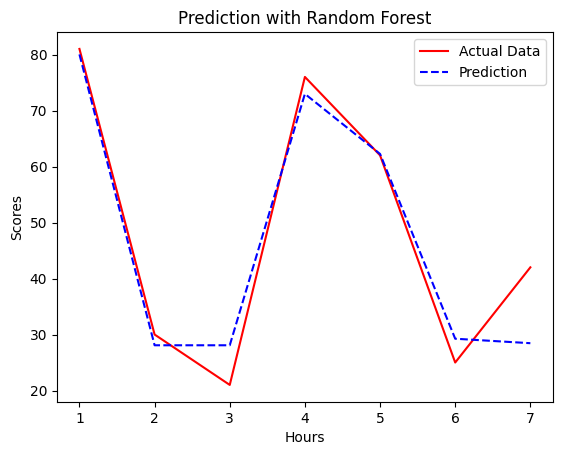

In [45]:
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred_rf, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [46]:
rsq_rf = r2_score(y_test, y_pred_rf)
print('r square Random Forest Results:', rsq_rf)

r square Random Forest Results: 0.9279381897086175


###Berdasarkan hasil evaluasi terhadap tiga model regresi yang digunakan, diperoleh bahwa Linear Regression menghasilkan nilai R² sebesar 0.9553, Random Forest Regressor menghasilkan R² sebesar 0.9279, sedangkan Decision Tree Regressor hanya menghasilkan R² sebesar 0.8804. Dari nilai evaluasi tersebut dapat disimpulkan bahwa model Linear Regression memberikan performa terbaik di antara ketiga model.

###Hal ini dapat dijelaskan karena dataset student scores memiliki hubungan yang hampir linear sempurna antara jumlah jam belajar dan skor yang diperoleh. Dengan kondisi tersebut, model Linear Regression mampu memetakan pola data dengan sangat baik sehingga akurasinya lebih tinggi dibandingkan model berbasis pohon keputusan. Sementara itu, Random Forest memang dapat meningkatkan kestabilan prediksi dibanding Decision Tree, tetapi tetap tidak mampu mengungguli Linear Regression pada kasus dengan pola hubungan yang jelas linear.

###Dengan demikian, model yang paling direkomendasikan untuk digunakan dalam memprediksi skor siswa berdasarkan jam belajar pada dataset ini adalah Linear Regression, karena tidak hanya sederhana dan efisien, tetapi juga terbukti memberikan hasil prediksi yang paling akurat sesuai dengan karakteristik data.